## Internship - MICS - CentraleSupelec - Felipe Moret & Ioane Muni Toke

In [526]:
import sys
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
np.set_printoptions(threshold=sys.maxsize)

**Investigating tick by tick data - Reconstruction of Order Flow using Aggregated Data**

**Reading Data**

In [527]:
quote_data_path = "/Users/felipemoret/Desktop/MICS_Internship/FR/book/BNPP.PA/2016-01-04-BNPP.PA-book.csv.gz"
trade_data_path = "/Users/felipemoret/Desktop/MICS_Internship/FR/trade/BNPP.PA/2016-01-04-BNPP.PA-trade.csv.gz"

##Reading order book (quotes) data
quote_data = pd.read_csv(quote_data_path, compression ='gzip', error_bad_lines = False)
trade_data = pd.read_csv(trade_data_path, compression ='gzip', error_bad_lines = False)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**Correcting columns' index for quotes data**

In [528]:
quote_data.head()

,xltime,Unnamed: 1,bid-price-1,bid-volume-1,ask-price-1,ask-volume-1,bid-price-2,bid-volume-2,ask-price-2,ask-volume-2,bid-price-3,bid-volume-3,ask-price-3,ask-volume-3,bid-price-4,bid-volume-4,ask-price-4,ask-volume-4,bid-price-5,bid-volume-5,ask-price-5,ask-volume-5,bid-price-6,bid-volume-6,ask-price-6,ask-volume-6,bid-price-7,bid-volume-7,ask-price-7,ask-volume-7,bid-price-8,bid-volume-8,ask-price-8,ask-volume-8,bid-price-9,bid-volume-9,ask-price-9,ask-volume-9,bid-price-10,bid-volume-10,ask-price-10,ask-volume-10
0,42373.218982,43.5,70,69.0,166,43.5,170,69.0,166,38.8,1500,69.0,166,37.8,1500,69.0,166,37.8,3000,69.0,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),NaN
1,42373.218982,43.5,70,69.0,166,43.5,170,69.0,166,38.8,1500,69.0,166,37.8,1500,69.0,166,37.8,3000,69.0,166,(),(),69,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),NaN
2,42373.218982,43.5,70,61.5,22,43.5,170,69.0,166,38.8,3000,68.5,50,37.8,3000,68.5,50,37.8,3000,69.0,166,(),(),69,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),NaN
3,42373.218982,43.5,70,61.5,22,43.5,170,69.0,166,38.8,3000,68.5,50,37.8,3000,68.5,50,37.8,3000,69.0,166,(),(),69,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),NaN
4,42373.218982,43.5,70,61.5,22,43.5,170,69.0,166,38.8,3000,68.5,50,37.8,3000,68.5,50,37.8,3000,69.0,166,(),(),69,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),NaN


In [529]:
quote_data_columns = quote_data.columns
quote_data_first_column = quote_data_columns[0] 
quote_data_columns = quote_data.columns[2:]
quote_data_columns = quote_data_columns.insert(0, quote_data_first_column)

In [530]:
quote_data = quote_data.iloc[: , :-1]

In [531]:
quote_data.columns = quote_data_columns

In [532]:
quote_data.head()

,xltime,bid-price-1,bid-volume-1,ask-price-1,ask-volume-1,bid-price-2,bid-volume-2,ask-price-2,ask-volume-2,bid-price-3,bid-volume-3,ask-price-3,ask-volume-3,bid-price-4,bid-volume-4,ask-price-4,ask-volume-4,bid-price-5,bid-volume-5,ask-price-5,ask-volume-5,bid-price-6,bid-volume-6,ask-price-6,ask-volume-6,bid-price-7,bid-volume-7,ask-price-7,ask-volume-7,bid-price-8,bid-volume-8,ask-price-8,ask-volume-8,bid-price-9,bid-volume-9,ask-price-9,ask-volume-9,bid-price-10,bid-volume-10,ask-price-10,ask-volume-10
0,42373.218982,43.5,70,69.0,166,43.5,170,69.0,166,38.8,1500,69.0,166,37.8,1500,69.0,166,37.8,3000,69.0,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),()
1,42373.218982,43.5,70,69.0,166,43.5,170,69.0,166,38.8,1500,69.0,166,37.8,1500,69.0,166,37.8,3000,69.0,166,(),(),69,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),()
2,42373.218982,43.5,70,61.5,22,43.5,170,69.0,166,38.8,3000,68.5,50,37.8,3000,68.5,50,37.8,3000,69.0,166,(),(),69,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),()
3,42373.218982,43.5,70,61.5,22,43.5,170,69.0,166,38.8,3000,68.5,50,37.8,3000,68.5,50,37.8,3000,69.0,166,(),(),69,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),()
4,42373.218982,43.5,70,61.5,22,43.5,170,69.0,166,38.8,3000,68.5,50,37.8,3000,68.5,50,37.8,3000,69.0,166,(),(),69,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),()


**Converting excel datetime for Paris datetime**

In [533]:
quote_data['fulldate'] = pd.TimedeltaIndex(quote_data['xltime'], unit = 'd') + dt.datetime(1899,12,30)
quote_data['fulldate'] = quote_data['fulldate'].astype('datetime64[ms]')
quote_data = quote_data.set_index('fulldate').tz_localize('UTC').tz_convert('Europe/Paris').tz_localize(None)
#quote_data = quote_data.reset_index()

In [534]:
quote_data = quote_data.drop("xltime", axis = 1)

In [535]:
quote_data.head()

,bid-price-1,bid-volume-1,ask-price-1,ask-volume-1,bid-price-2,bid-volume-2,ask-price-2,ask-volume-2,bid-price-3,bid-volume-3,ask-price-3,ask-volume-3,bid-price-4,bid-volume-4,ask-price-4,ask-volume-4,bid-price-5,bid-volume-5,ask-price-5,ask-volume-5,bid-price-6,bid-volume-6,ask-price-6,ask-volume-6,bid-price-7,bid-volume-7,ask-price-7,ask-volume-7,bid-price-8,bid-volume-8,ask-price-8,ask-volume-8,bid-price-9,bid-volume-9,ask-price-9,ask-volume-9,bid-price-10,bid-volume-10,ask-price-10,ask-volume-10
fulldate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-04 06:15:20.042,43.5,70,69.0,166,43.5,170,69.0,166,38.8,1500,69.0,166,37.8,1500,69.0,166,37.8,3000,69.0,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),()
2016-01-04 06:15:20.042,43.5,70,69.0,166,43.5,170,69.0,166,38.8,1500,69.0,166,37.8,1500,69.0,166,37.8,3000,69.0,166,(),(),69,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),()
2016-01-04 06:15:20.042,43.5,70,61.5,22,43.5,170,69.0,166,38.8,3000,68.5,50,37.8,3000,68.5,50,37.8,3000,69.0,166,(),(),69,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),()
2016-01-04 06:15:20.042,43.5,70,61.5,22,43.5,170,69.0,166,38.8,3000,68.5,50,37.8,3000,68.5,50,37.8,3000,69.0,166,(),(),69,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),()
2016-01-04 06:15:20.042,43.5,70,61.5,22,43.5,170,69.0,166,38.8,3000,68.5,50,37.8,3000,68.5,50,37.8,3000,69.0,166,(),(),69,166,(),(),(),(),(),(),(),(),(),(),(),(),(),(),(),()


**Correcting columns' index for trades data**

In [536]:
trade_data.columns = ['ts', 'price', 'volume', 'flag', 'rawflag']

In [537]:
trade_data.head(5)

,ts,price,volume,flag,rawflag
0,42373.100934,52.59,0.0,settlementprice,[BNPP]Settlement Price
1,42373.231234,52.23,0.0,settlementprice,[BNPP]Settlement Price
2,42373.260417,52.23,0.0,auctionphase,[BNPP]Auction Phase
3,42373.260418,52.23,0.0,theoricalprice|auctionphase,[PRC_QL_CD]IND[BNPP]Auction Phase
4,42373.260735,52.20,50.0,auctionphase,[BNPP]Auction Phase


**FIltering trade data for only "uncategorized" flag**

In [538]:
trade_data = trade_data[trade_data["flag"] == "uncategorized"]

In [539]:
trade_data.shape

(20200, 5)

**Converting excel datetime for Paris datetime**

In [540]:
trade_data['fulldate'] = pd.TimedeltaIndex(trade_data['ts'], unit = 'd') + dt.datetime(1899,12,30)
trade_data['fulldate'] = trade_data['fulldate'].astype('datetime64[ms]')
trade_data = trade_data.set_index('fulldate').tz_localize('UTC').tz_convert('Europe/Paris').tz_localize(None)
#trade_data = trade_data.reset_index()

In [541]:
trade_data = trade_data.drop("ts", axis = 1)

In [542]:
trade_data.head(5)

,price,volume,flag,rawflag
fulldate,,,,
2016-01-04 09:00:29.483,51.75,47.0,uncategorized,[ACT_FLAG1] [PRC_QL_CD]
2016-01-04 09:00:29.483,51.75,26.0,uncategorized,[ACT_FLAG1]
2016-01-04 09:00:29.483,51.75,1.0,uncategorized,[ACT_FLAG1]
2016-01-04 09:00:29.483,51.75,47.0,uncategorized,[ACT_FLAG1]
2016-01-04 09:00:29.483,51.75,50.0,uncategorized,[ACT_FLAG1]


**Analyzing number of repeated records**

In [543]:
print(trade_data.duplicated().sum())

8821


## Parsing the Quotes Data

**Analyzing the number of missing data**

In [544]:
quote_data.isna().sum()

bid-price-1      0
bid-volume-1     0
ask-price-1      0
ask-volume-1     0
bid-price-2      0
bid-volume-2     0
ask-price-2      0
ask-volume-2     0
bid-price-3      0
bid-volume-3     0
ask-price-3      0
ask-volume-3     0
bid-price-4      0
bid-volume-4     0
ask-price-4      0
ask-volume-4     0
bid-price-5      0
bid-volume-5     0
ask-price-5      0
ask-volume-5     0
bid-price-6      0
bid-volume-6     0
ask-price-6      0
ask-volume-6     0
bid-price-7      0
bid-volume-7     0
ask-price-7      0
ask-volume-7     0
bid-price-8      0
bid-volume-8     0
ask-price-8      0
ask-volume-8     0
bid-price-9      0
bid-volume-9     0
ask-price-9      0
ask-volume-9     0
bid-price-10     0
bid-volume-10    0
ask-price-10     0
ask-volume-10    0
dtype: int64

**Shape of the quotes data**

In [545]:
quote_data.shape

(504824, 40)

**Analyzing number of repeated records**

In [546]:
print(quote_data.duplicated().sum())

11695


**Removing duplicated rows**

In [547]:
quote_data = quote_data[~quote_data.duplicated()]

In [548]:
quote_data.shape

(493129, 40)

**Fixing a time period within the day for working...**

In [549]:
##initial_period = trade_data.index[0]
initial_period = pd.Timestamp('2016-01-04 09:10:00.00')

In [550]:
initial_period

Timestamp('2016-01-04 09:10:00')

In [552]:
final_period = trade_data.index[-1]
final_period = pd.Timestamp('2016-01-04 11:10:00.00')

In [553]:
final_period

Timestamp('2016-01-04 11:10:00')

**Getting quote_data and trade_data in the specified [initial_period, final_period]**

In [554]:
mask_quote = (quote_data.index > initial_period) & (quote_data.index <= final_period)
reduced_quote_data = quote_data[mask_quote] 

In [555]:
reduced_quote_data.shape

(119393, 40)

In [556]:
mask_trade = (trade_data.index > initial_period) & (trade_data.index <= final_period)
reduced_trade_data = trade_data[mask_trade] 

In [557]:
reduced_trade_data.shape

(5915, 4)

**Function to find LIMIT ORDER OR (A PRIORI) CANCELLATIONS in the Limit Order Book**

In [558]:
def return_changes_between_timestamps(reduced_quote_data):
        
    reduced_quote_data = reduced_quote_data.apply(pd.to_numeric)
    parsed_order_book = reduced_quote_data.diff()
    
    return parsed_order_book    

In [559]:
parsed_order_book = return_changes_between_timestamps(reduced_quote_data)

In [560]:
parsed_order_book = parsed_order_book.iloc[1:]

In [561]:
parsed_order_book.shape

(119392, 40)

In [562]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [563]:
def classify_changes_parsed_order_book_before_trading_match(reduced_quote_data, parsed_order_book):
    
    prices_bid_indices = [0,4,8,12,16,20,24,28,32,36]
    prices_ask_indices = [2,6,10,14,18,22,26,30,34,38]
    volume_bid_indices = [1,5,9,13,17,21,25,29,33,37]
    volume_ask_indices = [3,7,11,15,19,23,27,31,35,39]
        
    columns_names = ["Timestamp", "Level", "Side", "Price", "Quantity", "Flow"]
    before_trade_match_order_flow = pd.DataFrame( columns = columns_names)
    
    number_of_records = parsed_order_book.shape[0]
    
    ## Analyzing timestamps where only one change took place (one volume column)
    for i in range(0, number_of_records):
        change_indexes = list(parsed_order_book.iloc[i].to_numpy().nonzero()[0])
        if(intersection(change_indexes, (prices_bid_indices + prices_ask_indices)) == []):
            for volume_change_column_index in change_indexes:
                quantity = parsed_order_book.iloc[i].values[volume_change_column_index]
                if volume_change_column_index in volume_bid_indices:
                    level = volume_bid_indices.index(volume_change_column_index) + 1
                    side = "BID"
                else:
                    level = volume_ask_indices.index(volume_change_column_index) + 1
                    side = "ASK"
                if quantity > 0:
                    flow = "LIMIT ORDER"
                else:
                    flow = "CANCELLATION"
                timestamp = parsed_order_book.iloc[i].name
                price = reduced_quote_data.iloc[i+1].values[volume_change_column_index - 1]
                to_append = [timestamp, level, side, price, quantity, flow]
                to_append_series = pd.Series(to_append, index = before_trade_match_order_flow.columns)
                before_trade_match_order_flow  = before_trade_match_order_flow.append(to_append_series, ignore_index = True)
        else:
            for price_change_column_index in intersection(change_indexes, prices_bid_indices + prices_ask_indices):
                if(price_change_column_index in prices_bid_indices):
                    level = prices_bid_indices.index(price_change_column_index) + 1
                    side = "BID"  
                else:
                    level = prices_ask_indices.index(price_change_column_index) + 1
                    side = "ASK"
                                     
                price = reduced_quote_data.iloc[i+1].values[price_change_column_index]
   
                if(level == 1):
                    price_in_line_above_posterior_level = reduced_quote_data.iloc[i].values[price_change_column_index + 4]
                    if(float(price) ==  float(price_in_line_above_posterior_level)):
                        quantity = float(reduced_quote_data.iloc[i+1].values[price_change_column_index + 1]) - float(reduced_quote_data.iloc[i].values[price_change_column_index + 1 + 4])
                        price_in_line_above_same_level = reduced_quote_data.iloc[i].values[price_change_column_index]
                        quantity_in_live_above_same_level = float(reduced_quote_data.iloc[i].values[price_change_column_index + 1])
                        to_append = [timestamp, level, side, price_in_line_above_same_level, -1*quantity_in_live_above_same_level, "CANCELLATION"]
                        to_append_series = pd.Series(to_append, index = before_trade_match_order_flow.columns)
                        before_trade_match_order_flow  = before_trade_match_order_flow.append(to_append_series, ignore_index = True)
                    else:
                        quantity = reduced_quote_data.iloc[i+1].values[price_change_column_index + 1]
                    quantity = float(quantity)
                    
                elif(level == 10):
                    price_in_line_above_previous_level = reduced_quote_data.iloc[i].values[price_change_column_index - 4]
                    if(float(price) ==  float(price_in_line_above_previous_level)):
                        quantity = float(reduced_quote_data.iloc[i+1].values[price_change_column_index + 1]) - float(reduced_quote_data.iloc[i].values[price_change_column_index + 1 - 4])
                    else:
                        if(i >= 1):
                            price_in_two_lines_above_same_level =  reduced_quote_data.iloc[i-1].values[price_change_column_index]
                            if(float(price) ==  float(price_in_two_lines_above_same_level)):
                                quantity = float(reduced_quote_data.iloc[i+1].values[price_change_column_index + 1]) - float(reduced_quote_data.iloc[i-1].values[price_change_column_index + 1])
                        else:
                            quantity = "ERROR"
                            flow = "ERROR"              
                else:
                    price_in_line_above_posterior_level = reduced_quote_data.iloc[i].values[price_change_column_index + 4]
                    price_in_line_above_previous_level = reduced_quote_data.iloc[i].values[price_change_column_index - 4]
                    price_in_line_above_same_level = reduced_quote_data.iloc[i].values[price_change_column_index]
                    price_in_same_line_posterior_level = reduced_quote_data.iloc[i+1].values[price_change_column_index + 4]
                    if(float(price) ==  float(price_in_line_above_previous_level)):
                        quantity = float(reduced_quote_data.iloc[i+1].values[price_change_column_index + 1]) - float(reduced_quote_data.iloc[i].values[price_change_column_index + 1 - 4])
                    elif(float(price) ==  float(price_in_line_above_posterior_level)):
                        quantity = float(reduced_quote_data.iloc[i+1].values[price_change_column_index + 1]) - float(reduced_quote_data.iloc[i].values[price_change_column_index + 1 + 4])
                    
                    elif(price_in_line_above_same_level == price_in_same_line_posterior_level):
                        quantity = float(reduced_quote_data.iloc[i+1].values[price_change_column_index + 1])
                    else:
                        quantity = "ERROR"
                        flow = "ERROR"
                    
                if(quantity != "ERROR" and quantity > 0):
                    flow = "LIMIT ORDER"
                if(quantity != "ERROR" and  quantity < 0):
                    flow = "CANCELLATION"
                timestamp = parsed_order_book.iloc[i].name
                to_append = [timestamp, level, side, price, quantity, flow]
                to_append_series = pd.Series(to_append, index = before_trade_match_order_flow.columns)
                if(quantity != 0):
                    before_trade_match_order_flow  = before_trade_match_order_flow.append(to_append_series, ignore_index = True)
                
            remaining_change_indexes = list(set(change_indexes) - set(intersection(change_indexes, prices_bid_indices + prices_ask_indices)))
            number_of_indexes_volumes_already_checked = len(intersection(change_indexes, prices_bid_indices + prices_ask_indices))
            volumes_already_checked_indexes = intersection(change_indexes, prices_bid_indices + prices_ask_indices) + np.ones(number_of_indexes_volumes_already_checked)
            remaining_change_indexes = list(set(remaining_change_indexes) - set(volumes_already_checked_indexes))
            

            for volume_change_column_index in remaining_change_indexes:
                quantity = parsed_order_book.iloc[i].values[volume_change_column_index]
                if volume_change_column_index in volume_bid_indices:
                    level = volume_bid_indices.index(volume_change_column_index) + 1
                    side = "BID"
                else:
                    level = volume_ask_indices.index(volume_change_column_index) + 1
                    side = "ASK"
                if quantity > 0:
                    flow = "LIMIT ORDER"
                else:
                    flow = "CANCELLATION"
                timestamp = parsed_order_book.iloc[i].name
                price = reduced_quote_data.iloc[i+1].values[volume_change_column_index - 1]
                to_append = [timestamp, level, side, price, quantity, flow]
                to_append_series = pd.Series(to_append, index = before_trade_match_order_flow.columns)
                before_trade_match_order_flow  = before_trade_match_order_flow.append(to_append_series, ignore_index = True)
            
    return before_trade_match_order_flow    

In [564]:
before_trade_match_order_flow = classify_changes_parsed_order_book_before_trading_match(reduced_quote_data, parsed_order_book)

In [565]:
before_trade_match_order_flow.head()

,Timestamp,Level,Side,Price,Quantity,Flow
0,2016-01-04 09:10:00.043,1,ASK,50.95,250.0,LIMIT ORDER
1,2016-01-04 09:10:00.043,1,BID,50.92,-72.0,CANCELLATION
2,2016-01-04 09:10:00.043,1,ASK,50.95,-250.0,CANCELLATION
3,2016-01-04 09:10:00.043,3,BID,50.9,-282.0,CANCELLATION
4,2016-01-04 09:10:00.043,3,BID,50.9,-100.0,CANCELLATION


In [566]:
before_trade_match_order_flow.shape

(167291, 6)

**Is there a quote that is classified as an error ?**

In [567]:
before_trade_match_order_flow[before_trade_match_order_flow['Flow'] == 'ERROR']

,Timestamp,Level,Side,Price,Quantity,Flow


## Trying a first match with trade data - Direct matching

In [467]:
def direct_trade_match(before_trade_match_order_flow, reduced_trade_data):
            
    before_trade_match_cancellations = before_trade_match_order_flow[before_trade_match_order_flow["Flow"] == "CANCELLATION"]
    before_trade_match_cancellations = before_trade_match_cancellations[["Timestamp","Price","Quantity"]]
    before_trade_match_cancellations["Quantity"] = -1*before_trade_match_cancellations["Quantity"]
    before_trade_match_cancellations = before_trade_match_cancellations.reset_index()
    trade_data = reduced_trade_data[["price","volume"]]
    trade_data = trade_data.rename(columns = {"price":"Price", "volume":"Quantity"})
    trade_data = trade_data.reset_index()
    trade_data = trade_data.rename(columns = {"fulldate":"Timestamp"})
    before_trade_match_cancellations[["Price", "Quantity"]] = before_trade_match_cancellations[["Price", "Quantity"]].apply(pd.to_numeric)
    trade_data[["Price", "Quantity"]] = trade_data[["Price", "Quantity"]].apply(pd.to_numeric)
    number_of_trades = trade_data.shape[0]
    
    matched_results_price_quantity = 0
    matched_results_price_quantity_timestamp = 0

    
    ##Direct match Price-Volume
    for i in range(0, number_of_trades):
        if(list(trade_data[["Price", "Quantity"]].iloc[i].values) in list(map(list, list(before_trade_match_cancellations[["Price", "Quantity"]].values)))):
            matched_results_price_quantity += 1
            
    ##Direct match Timestamp-Price-Volume
    for i in range(0, number_of_trades):
        if(list(trade_data[["Timestamp", "Price", "Quantity"]].iloc[i].values) in list(map(list, list(before_trade_match_cancellations[["Timestamp", "Price", "Quantity"]].values)))):
            matched_results_price_quantity_timestamp += 1
                                              
    print(f"Percentage of matched trades only by Price-Volume: {100*(matched_results_price_quantity/number_of_trades):.2f}%\n")
    print(f"Percentage of matched trades by Timestamp-Price-Volume: {100*(matched_results_price_quantity_timestamp/number_of_trades):.2f}%\n")
    

In [468]:
direct_trade_match(before_trade_match_order_flow, reduced_trade_data)

Percentage of matched trades only by Price-Volume: 99.12%

Percentage of matched trades by Timestamp-Price-Volume: 6.01%



## Trying direct match permitting a $\delta$-lag in timestamp differences (Algorithm 1)

**Here we permit that the difference between the timestamps of a market order in the trades file and of a "cancellation" in the quotes file to be in the interval $[-\delta, +\delta]$.**

In [579]:
def trade_match_with_delta_lag(before_trade_match_order_flow, reduced_trade_data, min_delta, max_delta, number_deltas):    
    
    delta_vector = np.linspace(min_delta, max_delta, number_deltas).astype(int)
    matched_results_price_quantity_timestamp_by_delta_lag = np.zeros(number_deltas)
    differences_between_quote_and_trade_timestamps = []
    
    before_trade_match_cancellations = before_trade_match_order_flow[before_trade_match_order_flow["Flow"] == "CANCELLATION"]
    before_trade_match_cancellations = before_trade_match_cancellations[["Timestamp","Price","Quantity"]]
    before_trade_match_cancellations["Quantity"] = -1*before_trade_match_cancellations["Quantity"]
    before_trade_match_cancellations = before_trade_match_cancellations.reset_index()
    trade_data = reduced_trade_data[["price","volume"]]
    trade_data = trade_data.rename(columns = {"price":"Price", "volume":"Quantity"})
    trade_data = trade_data.reset_index()
    trade_data = trade_data.rename(columns = {"fulldate":"Timestamp"})
    before_trade_match_cancellations[["Price", "Quantity"]] = before_trade_match_cancellations[["Price", "Quantity"]].apply(pd.to_numeric)
    trade_data[["Price", "Quantity"]] = trade_data[["Price", "Quantity"]].apply(pd.to_numeric)
    number_of_trades = trade_data.shape[0]

    j = 0
    for delta in delta_vector:
        trade_data["FLAG"] = "UNMATCHED"
        before_trade_match_cancellations_tmp = before_trade_match_cancellations.copy()
        for i in range(0, number_of_trades):
            differences_between_timestamps = []
            price = trade_data["Price"].iloc[i]
            quantity = trade_data["Quantity"].iloc[i]
            trade_timestamp = trade_data["Timestamp"].iloc[i]
            list_of_matches = before_trade_match_cancellations_tmp[(before_trade_match_cancellations_tmp["Price"] == price) & (before_trade_match_cancellations_tmp["Quantity"] == quantity)]
            if(len(list_of_matches) != 0):
                timestamps_of_matches = list(list_of_matches["Timestamp"])
                for matched_timestamp in timestamps_of_matches:
                    differences_between_timestamps.append((trade_timestamp - matched_timestamp).total_seconds()*1000)

                absolute_differences_between_timestamps = np.abs(differences_between_timestamps)
                minimum_difference = min(absolute_differences_between_timestamps)
                
                if(minimum_difference <= delta):
                    matched_results_price_quantity_timestamp_by_delta_lag[j] += 1
                    k = np.argmin(absolute_differences_between_timestamps)
                    before_trade_match_cancellations_tmp.drop(before_trade_match_cancellations_tmp.loc[(before_trade_match_cancellations_tmp['Price'] == price) & (before_trade_match_cancellations_tmp['Quantity'] == quantity) & (before_trade_match_cancellations_tmp['Timestamp'] == timestamps_of_matches[k])].index, inplace = True)
                    trade_data.loc[i,"FLAG"] = "MATCHED"
                    differences_between_quote_and_trade_timestamps.append(differences_between_timestamps[k])

                    
        j += 1
        print(f"Match completed for {j} delta values")
     
    print("\n")
    print("--------------------------RESULTS--------------------------\n\n")

    for i in range(0, number_deltas):
        print(f"Percentage of matched trades by {delta_vector[i]}-ms-LagTimestamp-Price-Volume: {100*(matched_results_price_quantity_timestamp_by_delta_lag[i]/number_of_trades):.2f}%\n")
     
    plt.figure(figsize=(10,8))   
    plt.plot(delta_vector,  1 - matched_results_price_quantity_timestamp_by_delta_lag/number_of_trades, label = "BNPP", color = 'g')
    plt.title(r"Fraction of Unmatched Trades vs $\delta$")
    plt.xlabel(r"$\delta$")
    plt.ylabel("Unmatached Trades Fraction")
    plt.legend()
    plt.show()
    
    return differences_between_quote_and_trade_timestamps, trade_data

        

Match completed for 1 delta values
Match completed for 2 delta values
Match completed for 3 delta values
Match completed for 4 delta values
Match completed for 5 delta values
Match completed for 6 delta values
Match completed for 7 delta values
Match completed for 8 delta values
Match completed for 9 delta values
Match completed for 10 delta values
Match completed for 11 delta values
Match completed for 12 delta values
Match completed for 13 delta values
Match completed for 14 delta values
Match completed for 15 delta values
Match completed for 16 delta values
Match completed for 17 delta values
Match completed for 18 delta values
Match completed for 19 delta values
Match completed for 20 delta values
Match completed for 21 delta values
Match completed for 22 delta values
Match completed for 23 delta values
Match completed for 24 delta values
Match completed for 25 delta values
Match completed for 26 delta values
Match completed for 27 delta values
Match completed for 28 delta values
M

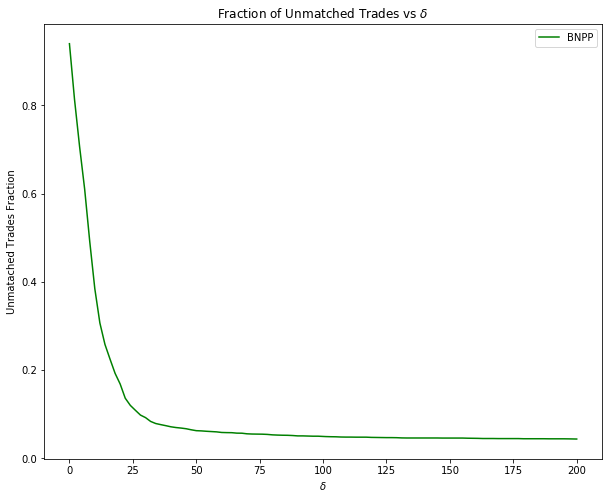

In [580]:
differences_between_quote_and_trade_timestamps_algo_1, trade_data_flagged_algo_1 = trade_match_with_delta_lag(before_trade_match_order_flow, reduced_trade_data, 0, 200, 100)

**Timestamps lag distribution of matched trades - Allgorithm 1**

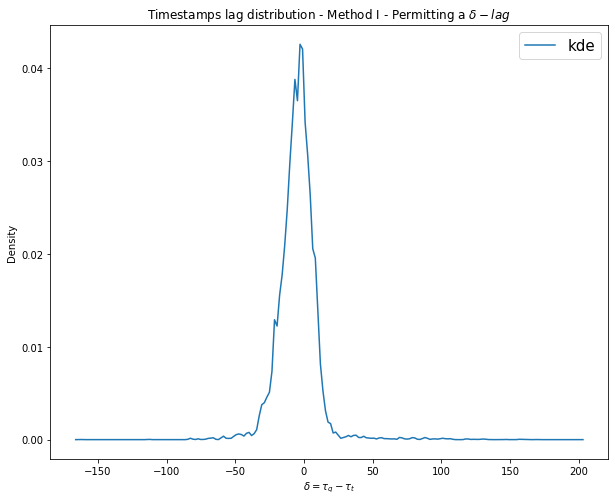

In [581]:
plt.figure(figsize=(10,8))
#plt.hist(differences_between_quote_and_trade_timestamps, bins = 100)
sns.kdeplot(data = differences_between_quote_and_trade_timestamps_algo_1, label='kde')
plt.title(r"Timestamps lag distribution - Method I - Permitting a $\delta-lag$ ")
plt.xlabel(r"$\delta = \tau_{q} - \tau_{t}$")
plt.ylabel("Density")
plt.legend(loc = 1, prop={'size': 15})

**Price distribtuion of unmatched trades - Algorithm 1**

In [582]:
unmatched_trades_data_algo_1 = trade_data_flagged_algo_1[trade_data_flagged_algo_1['FLAG'] == 'UNMATCHED']

In [583]:
unmatched_trades_data_algo_1.shape[0]

260

Text(0, 0.5, 'Count')

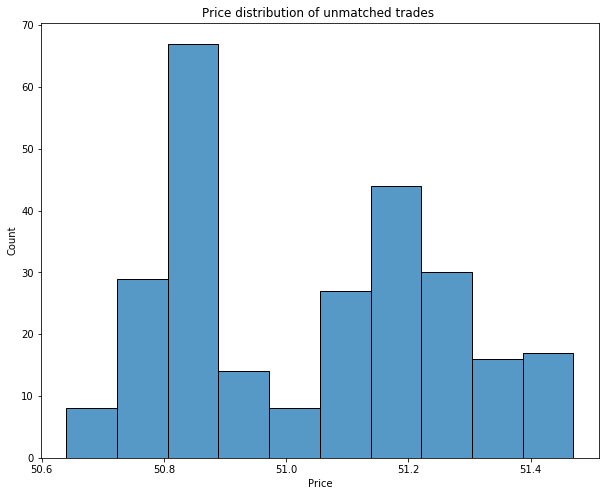

In [584]:
plt.figure(figsize = (10,8))
sns.histplot(data = unmatched_trades_data_algo_1['Price'], kde = False)
plt.title(r"Price distribution of unmatched trades ")
plt.xlabel(r"Price")
plt.ylabel("Count")

**Timestamp distribtuion of unmatched trades - Algorithm 1**

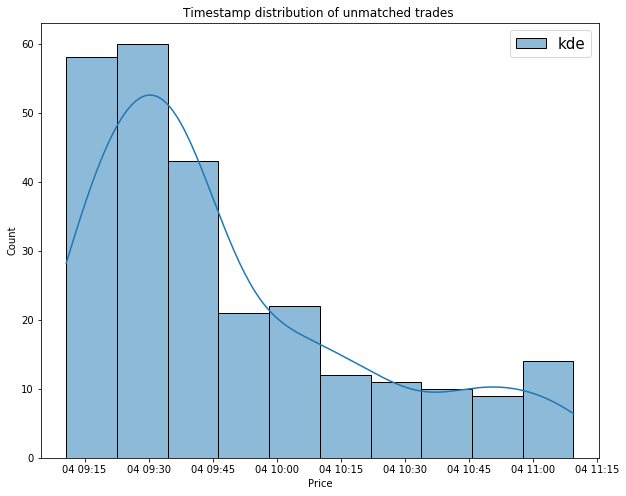

In [585]:
plt.figure(figsize = (10,8))
sns.histplot(data = unmatched_trades_data_algo_1['Timestamp'], kde = True, label = "kde")
plt.title(r"Timestamp distribution of unmatched trades ")
plt.xlabel(r"Price")
plt.ylabel("Count")
plt.legend(loc = 1, prop={'size': 15})

 ## Trying direct match permitting a $\delta$-lag in timestamp differences with possible aggregation of trades with the same timestamp and same price (Algorithm 2)

In [586]:
def generate_agregated_dataframes(list_of_trades_with_same_timestamp_and_price, maximum_block_size):
    aggregated_data_frames = []
    if(maximum_block_size >= list_of_trades_with_same_timestamp_and_price.shape[0]):
        maximum_block_size = list_of_trades_with_same_timestamp_and_price.shape[0]
        
    number_of_trades_to_aggregate = maximum_block_size
    columns_names = list_of_trades_with_same_timestamp_and_price.columns
    list_of_trades_with_same_timestamp_and_price = list_of_trades_with_same_timestamp_and_price.reset_index()
    
    for i in range(0, number_of_trades_to_aggregate):
        if i == 0:
            aggregated_data_frames.append(list_of_trades_with_same_timestamp_and_price)
        else:
            for j in range(0, number_of_trades_to_aggregate - i):
                new_list = list_of_trades_with_same_timestamp_and_price.copy()
                for k in range(1,i+1):
                    new_list.loc[j, "Quantity"] = new_list.loc[j, "Quantity"] + new_list.loc[j + k, "Quantity"]
                    new_list.drop(labels = j + k, inplace = True)
                aggregated_data_frames.append(new_list)
                
    return aggregated_data_frames

In [588]:
def trade_match_with_delta_lag_and_aggregation_timestamp_and_price(before_trade_match_order_flow, reduced_trade_data, min_delta, max_delta, number_deltas, maximum_block_size, print_option):    
    
    delta_vector = np.linspace(min_delta, max_delta, number_deltas).astype(int)
    matched_results_price_quantity_timestamp_by_delta_lag = np.zeros(number_deltas)
    differences_between_quote_and_trade_timestamps = []
    
    before_trade_match_cancellations = before_trade_match_order_flow[before_trade_match_order_flow["Flow"] == "CANCELLATION"]
    before_trade_match_cancellations = before_trade_match_cancellations[["Timestamp","Price","Quantity"]]
    before_trade_match_cancellations["Quantity"] = -1*before_trade_match_cancellations["Quantity"]
    before_trade_match_cancellations = before_trade_match_cancellations.reset_index()
    trade_data = reduced_trade_data[["price","volume"]]
    trade_data = trade_data.rename(columns = {"price":"Price", "volume":"Quantity"})
    trade_data = trade_data.reset_index()
    trade_data = trade_data.rename(columns = {"fulldate":"Timestamp"})
    before_trade_match_cancellations[["Price", "Quantity"]] = before_trade_match_cancellations[["Price", "Quantity"]].apply(pd.to_numeric)
    trade_data[["Price", "Quantity"]] = trade_data[["Price", "Quantity"]].apply(pd.to_numeric)
    number_of_trades = trade_data.shape[0]
    
    d = 0
    for delta in delta_vector:
        before_trade_match_cancellations_tmp = before_trade_match_cancellations.copy()
        trade_data["FLAG"] = "UNMATCHED"
        for i in range(0, number_of_trades):
            if(trade_data["FLAG"].iloc[i] == "UNMATCHED"):
                price = trade_data["Price"].iloc[i]
                quantity = trade_data["Quantity"].iloc[i]
                trade_timestamp = trade_data["Timestamp"].iloc[i]
                list_of_trades_with_same_timestamp_and_price = trade_data[(trade_data['Timestamp'] == trade_timestamp) & (trade_data['Price'] == price)]
                list_of_aggregated_dataframes = generate_agregated_dataframes(list_of_trades_with_same_timestamp_and_price, maximum_block_size)
                number_of_aggregated_data_frames = len(list_of_aggregated_dataframes)
                number_of_matches_per_aggregation = np.zeros(number_of_aggregated_data_frames)
                indexes_to_drop_per_aggregation =  [[]]*number_of_aggregated_data_frames
                indexes_of_matched_trades = [[]]*number_of_aggregated_data_frames
                j = 0
                for aggregated_trades_dataframe in list_of_aggregated_dataframes:
                    ##if(i == 0 and j == 1):
                    ##    print(aggregated_trades_dataframe)
                    ##    print("\n\n\n")
                        
                    before_trade_match_cancellations_tmp_2 = before_trade_match_cancellations_tmp.copy()
                    number_of_aggregated_trades = aggregated_trades_dataframe.shape[0]
                    for t_1 in range(0, number_of_aggregated_trades):
                        list_of_matches = pd.DataFrame(data = [], columns = before_trade_match_cancellations.columns)
                        differences_between_timestamps = []
                        price_t_1 = aggregated_trades_dataframe.iloc[t_1]["Price"]
                        quantity_t_1 = aggregated_trades_dataframe.iloc[t_1]["Quantity"]
                        index_t_1 = aggregated_trades_dataframe.iloc[t_1]["index"]
                        list_of_matches = list_of_matches.append(before_trade_match_cancellations_tmp_2[(before_trade_match_cancellations_tmp_2["Price"] == price_t_1) & (before_trade_match_cancellations_tmp_2["Quantity"] == quantity_t_1)], ignore_index = True)
                        ##if(i == 0 and j == 1):
                        ##    print(list_of_matches)
                        ##    print("\n\n")
                        number_of_matches = len(list_of_matches)
                        if(number_of_matches != 0):
                            for t_2 in range(0, number_of_matches):
                                matched_timestamp = list_of_matches.iloc[t_2]["Timestamp"]
                                differences_between_timestamps.append((trade_timestamp - matched_timestamp).total_seconds()*1000)
                            absolute_differences_between_timestamps = np.abs(differences_between_timestamps)
                            minimum_difference = min(absolute_differences_between_timestamps)
                            if(minimum_difference <= delta):
                                number_of_matches_per_aggregation[j] += 1
                                k = np.argmin(absolute_differences_between_timestamps)
                                differences_between_quote_and_trade_timestamps.append(differences_between_timestamps[k])
                                index_to_drop = list_of_matches.iloc[k]["index"]
                                indexes_to_drop_per_aggregation[j].append(index_to_drop)
                                indexes_of_matched_trades[j].append(index_t_1)
                                before_trade_match_cancellations_tmp_2.drop(before_trade_match_cancellations_tmp_2.loc[(before_trade_match_cancellations_tmp_2['index'] == index_to_drop)].index, inplace = True)
                    j += 1
                
                ##print(number_of_matches_per_aggregation)
                optimal_aggregation_index = np.argmax(number_of_matches_per_aggregation)
                if(optimal_aggregation_index != 0):
                    print(optimal_aggregation_index)
                final_indexes_to_drop = indexes_to_drop_per_aggregation[optimal_aggregation_index]
                final_trades_to_match = indexes_of_matched_trades[optimal_aggregation_index]

                
                for index_to_drop_from_original_data in final_indexes_to_drop:
                    before_trade_match_cancellations_tmp.drop(before_trade_match_cancellations_tmp.loc[(before_trade_match_cancellations_tmp['index'] == index_to_drop_from_original_data)].index, inplace = True)
                    
                ##print(before_trade_match_cancellations_tmp.shape[0])
                 
                for matched_trade_index in final_trades_to_match:
                    trade_data.loc[matched_trade_index,"FLAG"] = "MATCHED"
                    
        matched_results_price_quantity_timestamp_by_delta_lag[d] =  int(trade_data[trade_data["FLAG"] == "MATCHED"].shape[0])
        
        d += 1
        

        if(print_option == 1):
            print(f"Match completed for {d} delta values")
            
    if(print_option == 1): 
        print("\n")
        print("--------------------------RESULTS--------------------------\n\n")

        for i in range(0, number_deltas):
            print(f"Percentage of matched trades by {delta_vector[i]}-ms-LagTimestamp-Price-Volume: {100*(matched_results_price_quantity_timestamp_by_delta_lag[i]/number_of_trades):.2f}%\n")
     
        plt.figure(figsize=(10,8))   
        plt.plot(delta_vector,  1 - matched_results_price_quantity_timestamp_by_delta_lag/number_of_trades, label = "BNPP", color = 'g')
        plt.title(r"Fraction of Unmatched Trades vs $\delta$")
        plt.xlabel(r"$\delta$")
        plt.ylabel("Unmatached Trades Fraction")
        plt.legend()
        plt.show()
    
    final_unmatched_percent = 1 - (matched_results_price_quantity_timestamp_by_delta_lag[-1]/number_of_trades)
    
    return  differences_between_quote_and_trade_timestamps, trade_data, final_unmatched_percent

1
Match completed for 1 delta values


--------------------------RESULTS--------------------------


Percentage of matched trades by 200-ms-LagTimestamp-Price-Volume: 97.40%



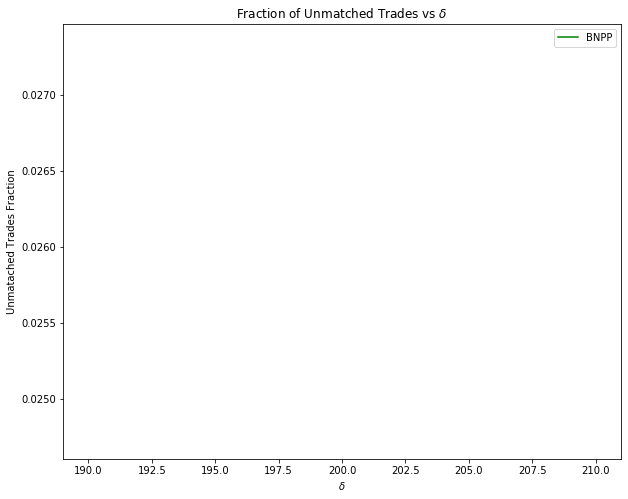

In [591]:
differences_between_quote_and_trade_timestamps_algo_2, trade_data_flagged_algo_2, final_unmatched_percent_algo2 = trade_match_with_delta_lag_and_aggregation_timestamp_and_price(before_trade_match_order_flow, reduced_trade_data, 200, 200, 1, 100, 1)


****Timestamps lag distribution of matched trades - Allgorithm 2****

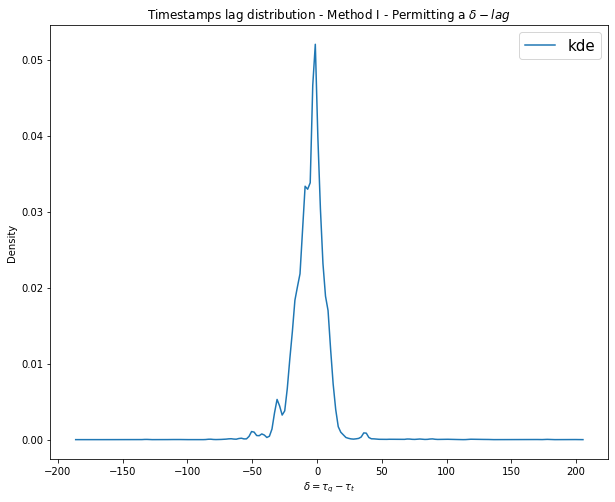

In [592]:
plt.figure(figsize=(10,8))
#plt.hist(differences_between_quote_and_trade_timestamps, bins = 100)
sns.kdeplot(data = differences_between_quote_and_trade_timestamps_algo_2, label='kde')
plt.title(r"Timestamps lag distribution - Method I - Permitting a $\delta-lag$ ")
plt.xlabel(r"$\delta = \tau_{q} - \tau_{t}$")
plt.ylabel("Density")
plt.legend(loc = 1, prop={'size': 15})

**Price distribtuion of unmatched trades - Algorithm 2**

In [593]:
unmatched_trades_data_algo_2 = trade_data_flagged_algo_2[trade_data_flagged_algo_2['FLAG'] == 'UNMATCHED']

In [594]:
unmatched_trades_data_algo_2.shape[0]

154

Text(0, 0.5, 'Count')

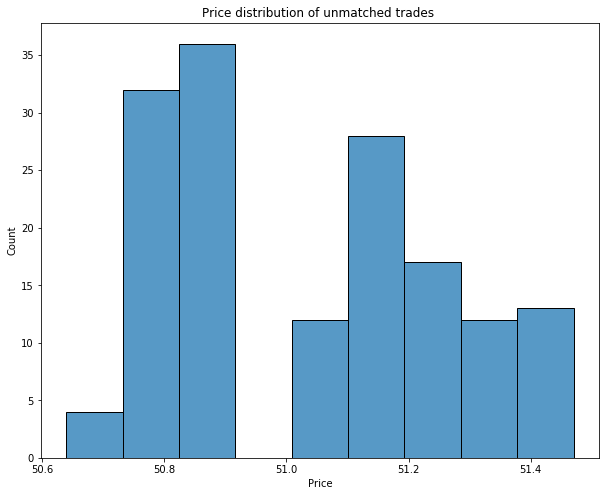

In [595]:
plt.figure(figsize = (10,8))
sns.histplot(data = unmatched_trades_data_algo_2['Price'], kde = False)
plt.title(r"Price distribution of unmatched trades ")
plt.xlabel(r"Price")
plt.ylabel("Count")

**Timestamp distribtuion of unmatched trades - Algorithm 2**

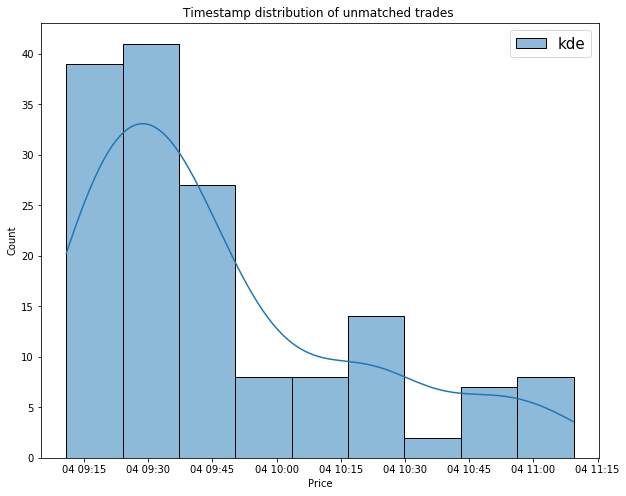

In [596]:
plt.figure(figsize = (10,8))
sns.histplot(data = unmatched_trades_data_algo_2['Timestamp'], kde = True, label = "kde")
plt.title(r"Timestamp distribution of unmatched trades ")
plt.xlabel(r"Price")
plt.ylabel("Count")
plt.legend(loc = 1, prop={'size': 15})

## What is the intersection between the unmatched trades of Algo 1 and Algo 2 ? And the difference ?

In [597]:
unmatched_trades_data_algo_1.shape[0]

260

In [598]:
unmatched_trades_data_algo_2.shape[0]

154

In [599]:
intersected_unmatched_trades = pd.merge(unmatched_trades_data_algo_1, unmatched_trades_data_algo_2, how='inner')

In [600]:
intersected_unmatched_trades.shape[0]

133

In [603]:
unmatched_trades_data_algo_2.head(100)

,Timestamp,Price,Quantity,FLAG
36,2016-01-04 09:10:50.340,50.88,32.0,UNMATCHED
67,2016-01-04 09:11:12.066,50.80,664.0,UNMATCHED
127,2016-01-04 09:12:06.283,50.85,138.0,UNMATCHED
128,2016-01-04 09:12:06.283,50.85,1320.0,UNMATCHED
130,2016-01-04 09:12:06.283,50.85,983.0,UNMATCHED
133,2016-01-04 09:12:06.283,50.85,7.0,UNMATCHED
138,2016-01-04 09:12:06.294,50.85,28.0,UNMATCHED
140,2016-01-04 09:12:06.304,50.85,562.0,UNMATCHED
151,2016-01-04 09:12:09.414,50.85,93.0,UNMATCHED
166,2016-01-04 09:12:20.393,50.86,48.0,UNMATCHED


In [609]:
before_trade_match_order_flow.iloc[3450:4000]

,Timestamp,Level,Side,Price,Quantity,Flow
3450,2016-01-04 09:11:39.724,1,ASK,50.82,48.0,LIMIT ORDER
3451,2016-01-04 09:11:39.724,1,ASK,50.82,-160.0,CANCELLATION
3452,2016-01-04 09:11:39.724,1,ASK,50.82,-48.0,CANCELLATION
3453,2016-01-04 09:11:39.724,1,BID,50.8,260.0,LIMIT ORDER
3454,2016-01-04 09:11:39.724,2,BID,50.79,184.0,LIMIT ORDER
3455,2016-01-04 09:11:39.724,1,BID,50.8,191.0,LIMIT ORDER
3456,2016-01-04 09:11:39.724,2,ASK,50.84,-250.0,CANCELLATION
3457,2016-01-04 09:11:39.724,1,BID,50.8,260.0,LIMIT ORDER
3458,2016-01-04 09:11:39.724,1,ASK,50.83,-212.0,CANCELLATION
3459,2016-01-04 09:11:39.724,1,BID,50.8,116.0,LIMIT ORDER


## Fraction of Unmatched Trades vs Maximum Size of Aggregation Block $N_{b}$

In [601]:
final_unmatched_percents = []
maximum_block_sizes_vector = np.arange(1,11)
for maximum_block_size in maximum_block_sizes_vector:
    _, _, final_unmatched_percent = trade_match_with_delta_lag_and_aggregation_timestamp_and_price(before_trade_match_order_flow, reduced_trade_data, 200, 200, 1, maximum_block_size, 0)
    final_unmatched_percents.append(final_unmatched_percent)
final_unmatched_percents = 100*np.array(final_unmatched_percents)
        

1
1
1
1
1
1
1
1
1


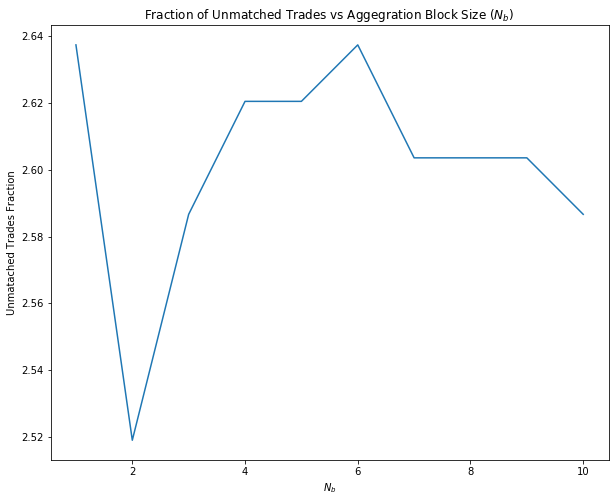

In [602]:
plt.figure(figsize=(10,8))
plt.plot(maximum_block_sizes_vector, final_unmatched_percents)  
plt.title(r"Fraction of Unmatched Trades vs Aggegration Block Size ($N_{b})$")
plt.xlabel(r"$N_{b}$")
plt.ylabel("Unmatached Trades Fraction")
plt.show()